In [30]:

import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [31]:

dataset = pd.read_csv('grad_desc.csv')
data = dataset.as_matrix()

numInstances = data.shape[0]

dataset.head()

,x,y
0,1,12.4
1,2,22.2
2,3,30.1
3,4,45.4
4,5,59.3


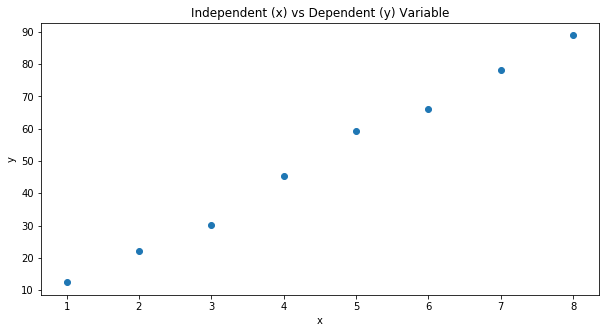

In [32]:
plt.figure(figsize=(10,5))
plt.title('Independent (x) vs Dependent (y) Variable')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:

def SSE(m,b,data):
    
    totalError = 0.0
    
    for i in range(numInstances):
        
        x = data[i,0] #Row i, column 0 -> x
        y = data[i,1] #Row i, column 1 -> y
        
        #The real rating
        currentTarget = y
        
        #Predicted rating with our current fitting line
        #y = mx + b
        currentOutput = m*x + b
        
        #Compute squared error
        currentSquaredError = (currentTarget - currentOutput)**2

        
        #Add it to the total error
        totalError += currentSquaredError

    sse = totalError/numInstances
    
    return totalError

In [39]:

# Guessing the values of m and b for fitting the line
m = 2
b = 5

sse = SSE(m, b, data)
        
print 'For the fitting line: y = %sx + %s \nSSE: %.2f' %(m,b,sse)

For the fitting line: y = 2x + 5 
SSE: 14104.32


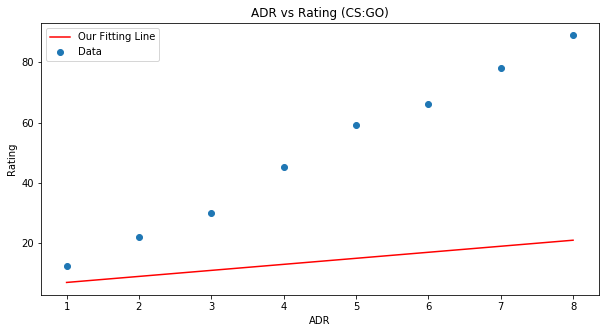

In [40]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

In [45]:

def gradient_descent_step(m,b,data):
    
    N = numInstances
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x_pair = data[i,0]
        y_pair = data[i,1]

        #Partial derivative respect 'm'
        dm = -((2/N) * x_pair * (y_pair - (m*x_pair + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/N) * (y_pair - (m*x_pair + b)))
    
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.01*m_grad
    b_updated = b - 0.01*b_grad
    
    #Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the learning rate.
    
    return m_updated,b_updated

In [46]:

# Trying out SSE and gradient descent

sse = SSE(m,b,data)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(2):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 2.00x + 5.00 - Error: 14104.32
At step 1 - Line: y = 2.00x + 5.00 - Error: 14104.32
At step 2 - Line: y = 2.00x + 5.00 - Error: 14104.32

Best  line: y = 2.00x + 5.00 - Error: 14104.32
